# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.datasets import load_iris

# Load Iris dataset as pandas DataFrame
iris_raw = load_iris(as_frame=True)
iris = iris_raw.frame  # Includes both features and target

# Check the dataset
iris.head()        # View first 5 rows
iris.info()        # Check column types and missing values
iris.describe()    # Summary statistics
iris["target"].value_counts()  # Check class distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


target
0    50
1    50
2    50
Name: count, dtype: int64

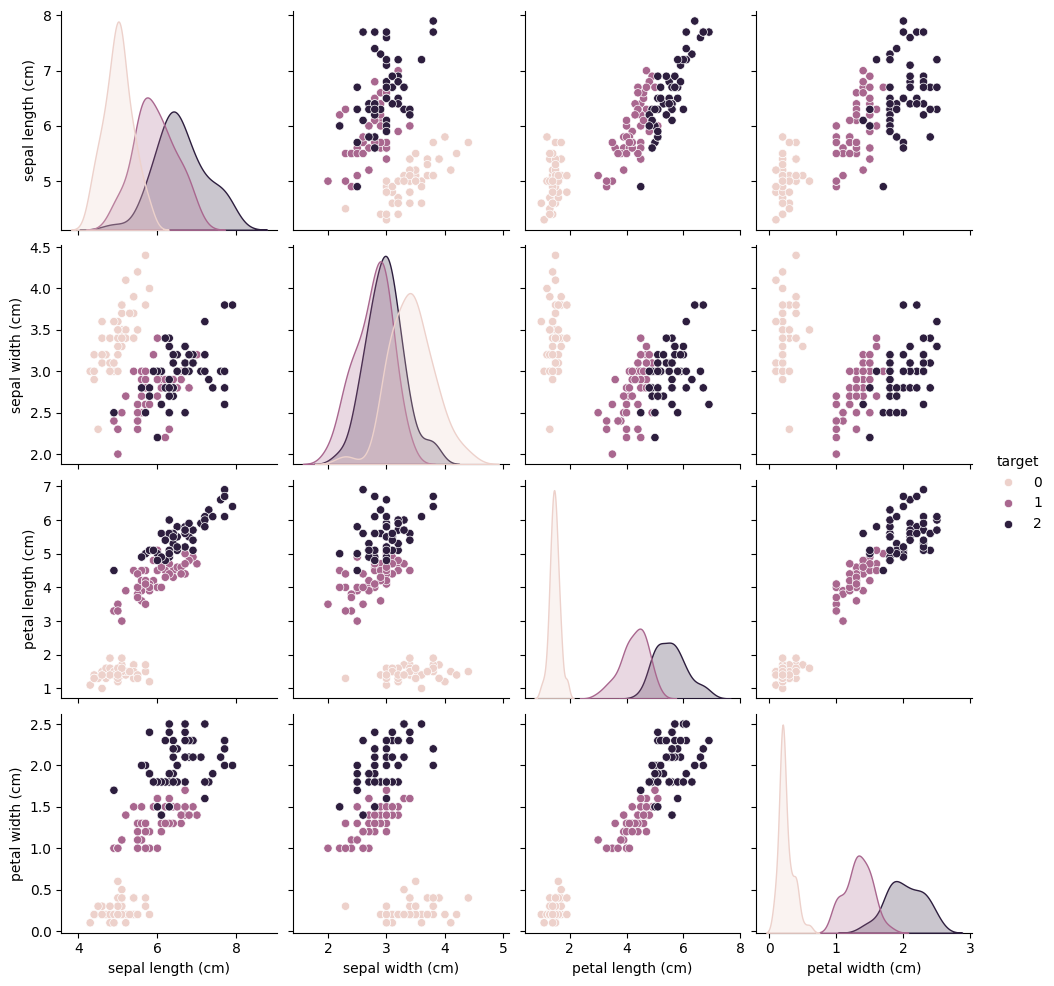

In [6]:
# Check for missing values
iris.isnull().sum()

#Check unique values
iris['target'].unique()

#Visualize the data
sns.pairplot(iris, hue='target')
plt.show()
# Split the data into features and target
X = iris.drop(columns=['target'])   


Feature Selection

Input features (X): sepal length, sepal width, petal length, petal width

Target (y): species (target column)

In [7]:
X = iris.drop('target', axis=1)
y = iris['target']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

print("Original class distribution:\n", y.value_counts(normalize=True))
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))



Original class distribution:
 target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64
Train distribution:
 target
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64
Test distribution:
 target
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64


# Train and Test for Features

In [11]:
from sklearn.model_selection import train_test_split

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=123, stratify=y_vis
)

X_vis = X[['petal length (cm)', 'petal width (cm)']]
y_vis = y



In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_vis_scaled = scaler.fit_transform(X_train_vis)
X_test_vis_scaled = scaler.transform(X_test_vis)


In [13]:
from sklearn.linear_model import LogisticRegression

model_vis = LogisticRegression(max_iter=200)
model_vis.fit(X_train_vis_scaled, y_train_vis)


LogisticRegression(max_iter=200)

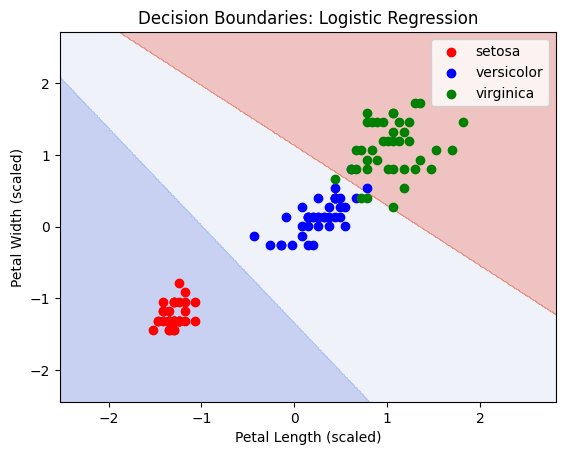

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Scatter plot of actual points
for i, color in zip([0,1,2], ['red','blue','green']):
    plt.scatter(X_train_vis_scaled[y_train_vis==i, 0], 
                X_train_vis_scaled[y_train_vis==i, 1], 
                c=color, label=iris_raw.target_names[i])
    
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('Decision Boundaries: Logistic Regression')
plt.legend()
plt.show()
